# DSR 20 - Backprop course

## 2. perceptron backprop



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, N,alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
        return x * (1 - x)

    
    def predict(self,X):
        # take the dot product between our features and weight matrix
        preds = self.sigmoid_activation(X.dot(self.W))
        
        # return the predictions
        return preds
            
    def fit(self, X, y,epochs):
        # initialize our weight matrix and list of losses
        print("training...")
       
        losses = []
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            error = preds - y
            loss = 0.5*np.sum(error ** 2)
            losses.append(loss)
            # the gradient descent update is the dot product between our
            # (1) features and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T,d)#X.T.dot(d)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        return losses

In [3]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1600, n_features=2, centers=2,
cluster_std=1.5, random_state=42)
y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entry in the feature
# matrix -- so we can train the bias as part of the weights
X = np.c_[X, np.ones((X.shape[0]))]
          
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [4]:
epochs = 100
alpha = 0.01
p = Perceptron(3,alpha=alpha)
losses = p.fit(trainX, trainY, epochs=epochs)

training...
epoch=  1 , loss=  91.13551704787749
epoch=  2 , loss=  76.19374473195165
epoch=  3 , loss=  0.9691236499599607
epoch=  4 , loss=  0.9176499018987675
epoch=  5 , loss=  0.8707032382548701
epoch=  6 , loss=  0.8280178326559082
epoch=  7 , loss=  0.7893121501144846
epoch=  8 , loss=  0.7542955748885684
epoch=  9 , loss=  0.7226765078666486
epoch=  10 , loss=  0.6941701057539851
epoch=  11 , loss=  0.6685045723793712
epoch=  12 , loss=  0.6454255467024322
epoch=  13 , loss=  0.624698580062399
epoch=  14 , loss=  0.6061099552834148
epoch=  15 , loss=  0.5894662133632671
epoch=  16 , loss=  0.5745927711409151
epoch=  17 , loss=  0.5613319795526285
epoch=  18 , loss=  0.5495409169943277
epoch=  19 , loss=  0.5390891528908888
epoch=  20 , loss=  0.5298566602002457
epoch=  21 , loss=  0.5217320039788163
epoch=  22 , loss=  0.5146108856756485
epoch=  23 , loss=  0.5083950787598184
epoch=  24 , loss=  0.502991750933632
epoch=  25 , loss=  0.49831313315272996
epoch=  26 , loss=  0.494

In [5]:
# evaluate our model
print("evaluating...")
preds = p.predict(testX)
# apply a step function to threshold the outputs to binary
# class labels
preds[preds <= 0.5] = 0
preds[preds > 0] = 1
print(classification_report(testY, preds))

evaluating...
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       403
           1       1.00      0.99      1.00       397

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



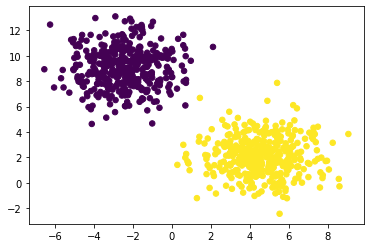

In [6]:
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

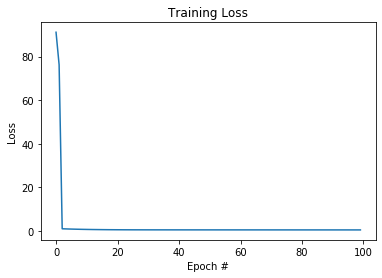

In [7]:
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Gradient Descent can be very slow and wasteful.
#### Especially if you are dealing with big data sets the computation becomes very coastly, yielding huge matrix calculations 
$$ W \cdot{X}   $$
#### the following is a more efficient way to perform GD with faster convergence.

## Stochastic Gradient descent
### instead of updating the weights on an entire epoch we do more updates on mini-batches of data.

#### implement sgd in out perceptron class (batches of 16)

In [8]:
class Perceptron:
    def __init__(self, N,alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
        return x * (1 - x)

    
    def predict(self,X):
        # take the dot product between our features and weight matrix
        preds = self.sigmoid_activation(X.dot(self.W))
        
        # return the predictions
        return preds
            
    def fit(self, X, y,epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        x=np.split(X,len(X)/16,axis=0)
        print(np.array(x).shape)
        yy=np.split(y,len(X)/16,axis=0)
        losses = []
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            for ind,batch in enumerate(x):
                preds = self.predict(batch)
                # now that we have our predictions, we need to determine the
                # `error`, which is the difference between our predictions and
                # the true values
                error = preds - yy[ind]
                loss = 0.5*np.sum(error ** 2)
                losses.append(loss)
                # the gradient descent update is the dot product between our
                # (1) features and (2) the error of the sigmoid derivative of
                # our predictions
                d = error * self.sigmoid_deriv(preds)
                gradient = np.dot(batch.T,d)#X.T.dot(d)
                # in the update stage, all we need to do is "nudge" the weight
                # matrix in the negative direction of the gradient (hence the
                # term "gradient descent" by taking a small step towards a set
                # of "more optimal" parameters
                self.W += -self.alpha * gradient
                # check to see if an update should be displayed
            # randomize the data between epochs
            idx=np.random.permutation(len(X))
            X=np.array(X)[idx]
            y=np.array(y)[idx]
            x=np.split(X,len(X)/16,axis=0)
            yy=np.split(y,len(X)/16,axis=0)
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        return losses

In [9]:
epochs = 100
alpha = 0.01
p = Perceptron(3,alpha=alpha)
losses2 = p.fit(trainX, trainY, epochs=epochs)

training...
(50, 16, 3)
epoch=  1 , loss=  0.09354599150987565
epoch=  2 , loss=  0.046225660680318886
epoch=  3 , loss=  0.09786261955217204
epoch=  4 , loss=  0.03772329637289596
epoch=  5 , loss=  0.05526827499639417
epoch=  6 , loss=  0.11569610233037407
epoch=  7 , loss=  0.022818435729192982
epoch=  8 , loss=  0.10619795930511122
epoch=  9 , loss=  0.00811931832874289
epoch=  10 , loss=  0.06133111763385829
epoch=  11 , loss=  0.14378790370485356
epoch=  12 , loss=  0.000254057851030873
epoch=  13 , loss=  0.06156215292755211
epoch=  14 , loss=  0.012549263480790366
epoch=  15 , loss=  0.0019779722481292335
epoch=  16 , loss=  0.09106487206194928
epoch=  17 , loss=  0.002491032591276753
epoch=  18 , loss=  0.02440200884012877
epoch=  19 , loss=  0.0222438757078122
epoch=  20 , loss=  0.022252319742734297
epoch=  21 , loss=  0.006346088056704514
epoch=  22 , loss=  0.00030379452440461877
epoch=  23 , loss=  0.027523790178762896
epoch=  24 , loss=  0.003523135568306771
epoch=  25 ,

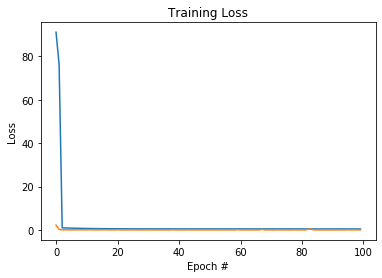

In [10]:
plt.plot(np.arange(0, epochs), losses)
plt.plot(np.arange(0, epochs), losses2[1:5000:50])
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()